In [13]:
%load_ext autoreload
%autoreload 2

In [14]:
def convert_dict(dict_i):
    conv = {}
    for type_exp, d1 in dict_i.items():
        for type_gen,d2 in d1.items():
            if type_gen not in conv:
                conv[type_gen] = {}
            conv[type_gen][type_exp]=  {float(k):v for k,v in d2.items()}
    return conv

In [15]:
def load_json(filename):
    import json
    with open(
        filename,
        "r",
    ) as fp:
        dict_i = json.load(fp)  
    return dict_i

In [16]:
def abbreviateValue(value, abbreviations={}):
    for k, v in abbreviations.items():
        if k in value:
            
            value = value.replace(k, v)
    #TODO
    if value[0:2] not in ["q_", "u_"]:
        value = value.replace("_", " ")
    return value
    
def abbreviate_dict_value(input_dict, abbreviations):
    
    conv ={}
    for k1, dict_i in input_dict.items():
        conv[k1] = { abbreviateValue(k, abbreviations): d for k, d in dict_i.items()}
    return conv

In [5]:
import os

output_fig_dir = os.path.join(os.path.curdir, "output_figures", "figures", "output_performance_reference")
from pathlib import Path

Path(output_fig_dir).mkdir(parents=True, exist_ok=True)

In [17]:
name_folder_output = "output"

In [20]:
compute_results = False

In [22]:
if compute_results:
    from experiments_adult_trees import run_adult_experiments_trees

    run_adult_experiments_trees(
        name_output_dir="results",
        type_experiments=["one_at_time", "all_attributes"],
        type_criterion="weighted_sum_abs_reference_s",
        min_support_tree=0.1,
        metrics=["d_outcome"],
        verbose=False,
        ouput_folder_dir=name_folder_output,
    )

In [25]:
import os

output_fig_dir = os.path.join(os.path.curdir, "output", "figures", "output_performance")
from pathlib import Path

Path(output_fig_dir).mkdir(parents=True, exist_ok=True)

# Read data

In [26]:
abbreviations = {"one_at_time":"indiv t.", "all_attributes":"comb t.", "continuous":"c", \
                 "quantile": "quant #bins:", "uniform":"unif #bins:", "weighted_sum_abs_reference_s":"w$\Delta$", "entropy":"entr",\
                "without_gen": "Leaf items", "with_gen": "All items"}

In [27]:
q_abbr = abbreviations["quantile"]
u_abbr = abbreviations["uniform"]

In [53]:
label_names = {"one_at_time":"indiv t.", "all_attributes":"comb t.", \
                 "quantile": "q", "uniform":"u", "weighted_sum_abs_reference_s":"w$\Delta$", "entropy":"entr",\
                "without_gen": "Leaf items", "with_gen": "All items"}

In [54]:
label_names_2 = {"one_at_time":"indiv t.", "all_attributes":"comb t.", "continuous":"c", \
                 "quantile": "q", "uniform":"u", "weighted_sum_abs_reference_s":"w$\Delta$", "entropy":"entr",\
                "without_gen": "Leaf", "with_gen": "All"}

In [29]:
tree_keys = ['weighted_sum_abs_reference_s_one_at_time', 'weighted_sum_abs_reference_s_all_attributes', 'entropy_one_at_time', 'entropy_all_attributes']
tree_keys = [abbreviateValue(k, abbreviations) for k in tree_keys]

In [30]:
info = {}

In [33]:
min_sup_tree = 0.1

metric= "d_outcome"
type_criterion = "weighted_sum_abs_reference_s"

type_criterions = ["weighted_sum_abs_reference_s"]
dataset_name = "adult_income"
import os
output_results= os.path.join(os.path.curdir, name_folder_output, "results")

In [37]:
import os

info_tree = {type_criterion:{} for type_criterion in type_criterions}

info_ex_discr = {}

for info_i in ["max", "FP"]:

    for type_criterion in type_criterions:
        print(type_criterion)
        filename = os.path.join(output_results, dataset_name ,type_criterion,f"stree_{min_sup_tree}", metric, "gain_0",  f"info_ALL_{info_i}.json")

        info_tree[type_criterion][info_i] = abbreviate_dict_value(convert_dict(load_json(filename)), abbreviations)

weighted_sum_abs_reference_s
weighted_sum_abs_reference_s


In [38]:
info_tree.keys()

dict_keys(['weighted_sum_abs_reference_s'])

In [39]:
for info_i in info:
    for type_gen in info[info_i]:
        if "all_c" in info[info_i][type_gen]:
            info[info_i][type_gen].pop("all_c")

In [40]:
color_labels = {}
color_labels[abbreviateValue('weighted_sum_abs_reference_s_one_at_time', abbreviations)]="orangered"
color_labels[abbreviateValue('weighted_sum_abs_reference_s_all_attributes', abbreviations)]="orange"
color_labels['user']="crimson"

In [41]:
save_fig = False

In [42]:
type_gens = ["without_gen", "with_gen"]

In [43]:
info_i="max"

info_dicts = {}

info_plot_max = {type_gen:{} for type_gen in type_gens}
for type_gen in type_gens:
        
    for type_criterion in type_criterions:
        info_plot_max[type_gen].update({abbreviateValue(f"{type_criterion}_{type_exp}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items()})

In [44]:
def select_keys(dict_i, keys_sel):
    return {k:dict_i[k] for k in keys_sel if k in dict_i}

# Plot max \Delta_income

In [47]:
save_fig = True

./output/figures/output_performance/adult_income_stree_0.1_d_outcome_max_tree_all2.pdf


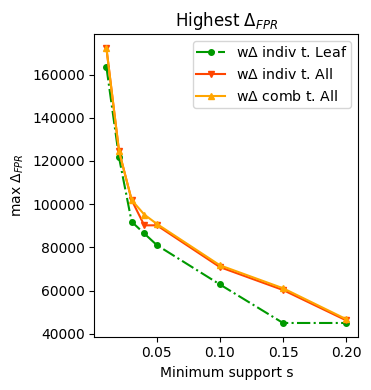

In [56]:
info_i = "max"

color_labels = {}
color_labels[abbreviateValue('entropy_one_at_time Leaf', abbreviations)]="#7fcc7f"
color_labels[abbreviateValue('weighted_sum_abs_reference_s_one_at_time Leaf', abbreviations)]="#009900"


color_labels[abbreviateValue('entropy_one_at_time All', abbreviations)]="mediumblue"
color_labels[abbreviateValue('weighted_sum_abs_reference_s_one_at_time All', abbreviations)]="orangered"
color_labels[abbreviateValue('entropy_all_attributes All', abbreviations)]="royalblue"
color_labels[abbreviateValue('weighted_sum_abs_reference_s_all_attributes All', abbreviations)]="orange"

lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( "Leaf" in k and "entr" in k)})
lines_style.update({k:"-." for k in color_labels if( "Leaf" in k and "w$\\Delta$" in k)})



size_fig = (3.8,4)


info_plot = {}
for type_gen in type_gens:
    for type_criterion in type_criterions:
        info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v})

        
figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_all2.pdf")
print(figure_name)


from utils_plot import plotDicts

plotDicts(info_plot, marker=True, \
          linestyle=lines_style, sizeFig=size_fig, title="Highest $\Delta_{FPR}$",
          xlabel="Minimum support s",  ylabel="max $\Delta_{FPR}$", labelSize=10.2,
          outside=False, color_labels=color_labels, saveFig=True, nameFig = figure_name)

# Plot FP

./output/figures/output_performance/adult_income_stree_0.1_d_outcome_FP_tree_all2.pdf


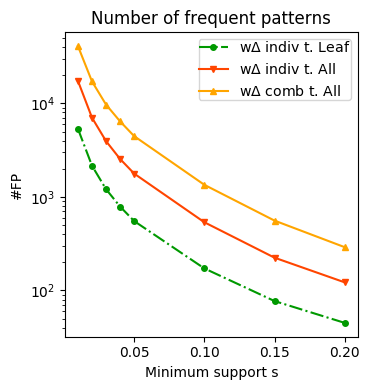

In [59]:
info_i = "FP"

color_labels = {}
color_labels[abbreviateValue('entropy_one_at_time Leaf', abbreviations)]="#7fcc7f"
color_labels[abbreviateValue('weighted_sum_abs_reference_s_one_at_time Leaf', abbreviations)]="#009900"


color_labels[abbreviateValue('entropy_one_at_time All', abbreviations)]="mediumblue"
color_labels[abbreviateValue('weighted_sum_abs_reference_s_one_at_time All', abbreviations)]="orangered"
color_labels[abbreviateValue('entropy_all_attributes All', abbreviations)]="royalblue"
color_labels[abbreviateValue('weighted_sum_abs_reference_s_all_attributes All', abbreviations)]="orange"

lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( "Leaf" in k and "entr" in k)})
lines_style.update({k:"-." for k in color_labels if( "Leaf" in k and "w$\\Delta$" in k)})



size_fig = (3.8,4)


info_plot = {}
for type_gen in type_gens:
    for type_criterion in type_criterions:
        info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v})

        
figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_all2.pdf")
print(figure_name)

    
from utils_plot import plotDicts

plotDicts(info_plot,  marker=True, \
          linestyle=lines_style, title="Number of frequent patterns",
          xlabel="Minimum support s",  ylabel="#FP",
          yscale="log", sizeFig=size_fig, labelSize=10.2,
          outside=False, color_labels=color_labels, borderpad=0.05, saveFig=True, nameFig = figure_name)